<a href="https://colab.research.google.com/github/kanishkraj69/content/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# import warnings
# warnings.filterwarnings('ignore')
path="/content/drive/MyDrive/Master File MERGEDFILE.CSV"
df = pd.read_csv(path, encoding= 'unicode_escape')
print(df.head)

#df['label'] = df['label'].astype(int)

<bound method NDFrame.head of        index                                               text label  \
0          1  RT @warreports: 8 Pakistanis of #IRGC 's Zeyna...     1   
1          2                gronk tide pod commercial retarded      1   
2          3  @sfrantzman @pmakela1 what they found in Syria...     0   
3          4  After Pakistani Taliban announcement of their ...     0   
4          5  Good luck getting our attention this week ISIS...     0   
...      ...                                                ...   ...   
10127  10128              mamona eso ya es mu antiguo... ??????     0   
10128  10129  Joder, as? que para Antena3, Constituci?n = Fr...     0   
10129  10130  La fiscal?a va a estar muy ocupada investigand...     0   
10130  10131  Odiame pero al mirarte a un espejo recuerda: y...     1   
10131  10132      alex ya sabemos que eres gay no disimules m?s     0   

      Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0            NaN  

Clean : DELETE THE SPECIAL CHARACTERS

In [ ]:
df.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9'], axis=1, inplace=True)

df['text'] = df['text'].str.replace(r'\W'," ",regex=True)
print(df.head)


<bound method NDFrame.head of        index                                               text label
0          1  RT  warreports  8 Pakistanis of  IRGC  s Zeyna...     1
1          2                gronk tide pod commercial retarded      1
2          3   sfrantzman  pmakela1 what they found in Syria...     0
3          4  After Pakistani Taliban announcement of their ...     0
4          5  Good luck getting our attention this week ISIS...     0
...      ...                                                ...   ...
10127  10128              mamona eso ya es mu antiguo               0
10128  10129  Joder  as  que para Antena3  Constituci n   Fr...     0
10129  10130  La fiscal a va a estar muy ocupada investigand...     0
10130  10131  Odiame pero al mirarte a un espejo recuerda  y...     1
10131  10132      alex ya sabemos que eres gay no disimules m s     0

[10132 rows x 3 columns]>


Clean : DELETE THE  NULL VALUE

In [ ]:
df.isnull().sum()
df.dropna()

,index,text,label
0,1,RT warreports 8 Pakistanis of IRGC s Zeyna...,1
1,2,gronk tide pod commercial retarded,1
2,3,sfrantzman pmakela1 what they found in Syria...,0
3,4,After Pakistani Taliban announcement of their ...,0
4,5,Good luck getting our attention this week ISIS...,0
...,...,...,...
10127,10128,mamona eso ya es mu antiguo,0
10128,10129,Joder as que para Antena3 Constituci n Fr...,0
10129,10130,La fiscal a va a estar muy ocupada investigand...,0
10130,10131,Odiame pero al mirarte a un espejo recuerda y...,1


In [ ]:
df['label'] = pd.to_numeric(df['label'], errors='coerce')

# Drop the rows containing NaN in the 'label' column
df = df.dropna(subset=['label'])

# Convert the 'label' column to integer type
df['label'] = df['label'].astype(int)

# Now you can use the converted 'label' column for your classification task
print(df['label'])

0        1
1        1
2        0
3        0
4        0
        ..
10127    0
10128    0
10129    0
10130    1
10131    0
Name: label, Length: 10083, dtype: int64


<ipython-input-5-6061a4ebefc0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


MAKE 3 DIFFERENT LANGUAGES .CSV FILE

In [ ]:
!pip install langdetect

from langdetect import detect, LangDetectException



# Create empty dataframes for each language
english_df = pd.DataFrame(columns=['index', 'text', 'label'])
german_df = pd.DataFrame(columns=['index', 'text', 'label'])
spanish_df = pd.DataFrame(columns=['index', 'text', 'label'])

# Loop through each row of the original CSV file
for index, row in df.iterrows():
    text = row['text']
    if text and len(text) > 0:  # Check that text is not empty or too short
        try:
            lang = detect(text)
        except LangDetectException:
            continue
        if lang == 'en':
            # Add the row to the English dataframe
            english_df = english_df.append(row)
        elif lang == 'de':
            # Add the row to the German dataframe
            german_df = german_df.append(row)
        elif lang == 'es':
            # Add the row to the Spanish dataframe
            spanish_df = spanish_df.append(row)

# Write the new dataframes to separate CSV files
english_df.to_csv('english.csv', index=False)
german_df.to_csv('german.csv', index=False)
spanish_df.to_csv('spanish.csv', index=False)

#Print the contents of the new CSV files
# print('Contents of english.csv:')
# with open('english.csv', 'r') as f:
#     print(f.read())
# print('Contents of german.csv:')
# with open('german.csv', 'r') as f:
#     print(f.read())
# print('Contents of spanish.csv:')
# with open('spanish.csv', 'r') as f:
#     print(f.read())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 58.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=6a96691d837a50e979444fd1eee473c5b0adf01e9e44a03825486c8811e6fea0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


Streaming output truncated to the last 5000 lines.
<ipython-input-6-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-6-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-6-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-6-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  german_df = german_df.append(row)
<ipython-input-6-4e90cad4dfca>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

PRINT 3 LANGUAGES .CSV FILE

In [ ]:
df_E = pd.read_csv('english.csv')
df_G = pd.read_csv('german.csv')
df_S = pd.read_csv('spanish.csv')


In [ ]:
from prettytable import PrettyTable

count_E0 = (df_E['label'] == 0).sum()
count_E1 = (df_E['label'] == 1).sum()

count_G0 = (df_G['label'] == 0).sum()
count_G1 = (df_G['label'] == 1).sum()


count_S0 = (df_S['label'] == 0).sum()
count_S1 = (df_S['label'] == 1).sum()


table = PrettyTable()
table.field_names = ["Language", "Hate", "Non Hate"]
table.add_row(["English",count_E1,count_E0])
table.add_row(["German",count_G1,count_G0])
table.add_row(["Spanish",count_S1,count_S0])

print(table)


+----------+------+----------+
| Language | Hate | Non Hate |
+----------+------+----------+
| English  | 2423 |   2573   |
|  German  | 1522 |   1514   |
| Spanish  | 323  |   829    |
+----------+------+----------+


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
text1 = " ".join(title for title in df.text)
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')


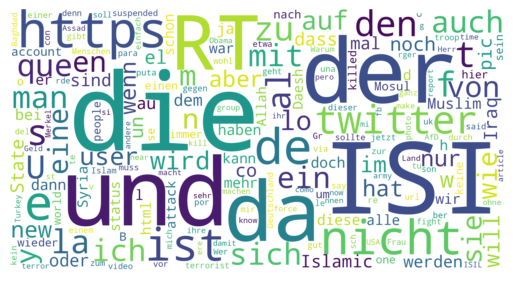

In [ ]:
# Display the generated Word Cloud

plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
!python -m pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 71.2 MB/s eta 0:00:00


MODEL

In [ ]:
# Load the BERT preprocessor and encoder
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4")

# Define the model
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(256, activation='relu', name='dense')(l)
l = tf.keras.layers.Dense(7, activation='softmax', name='output')(l)
model = tf.keras.Model(inputs=text_input, outputs=l)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', verbose=2, patience=5)





In [ ]:
text_data = df['text'].values.tolist()
text_data = np.array(text_data)
label_data = df['label'].values.tolist()
label_data = np.array(label_data)
#print(label_data)

In [ ]:
#ALL DATA
# Train the model



history = model.fit(text_data, label_data, epochs=32, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy = accuracy_score(label_data, predicted_labels)
precision = precision_score(label_data, predicted_labels, average='macro')
recall = recall_score(label_data, predicted_labels, average='macro')
f1 = f1_score(label_data, predicted_labels, average='macro')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/32
253/253 [==============================] - 144s 508ms/step - loss: 0.6489 - accuracy: 0.6271 - val_loss: 0.7201 - val_accuracy: 0.5201
Epoch 2/32
253/253 [==============================] - 126s 496ms/step - loss: 0.5861 - accuracy: 0.6827 - val_loss: 0.8262 - val_accuracy: 0.4581
Epoch 3/32
253/253 [==============================] - 105s 417ms/step - loss: 0.5948 - accuracy: 0.6751 - val_loss: 0.8236 - val_accuracy: 0.5920
Epoch 4/32
253/253 [==============================] - 125s 495ms/step - loss: 0.5607 - accuracy: 0.7047 - val_loss: 0.6958 - val_accuracy: 0.5786
Epoch 5/32
253/253 [==============================] - 105s 415ms/step - loss: 0.5672 - accuracy: 0.6898 - val_loss: 0.6859 - val_accuracy: 0.5796
Epoch 6/32
253/253 [==============================] - 125s 495ms/step - loss: 0.5431 - accuracy: 0.7042 - val_loss: 0.7670 - val_accuracy: 0.4854
Epoch 7/32
253/253 [==============================] - 125s 495ms/step - loss: 0.5410 - accuracy: 0.7058 - val_loss: 0.7855 -

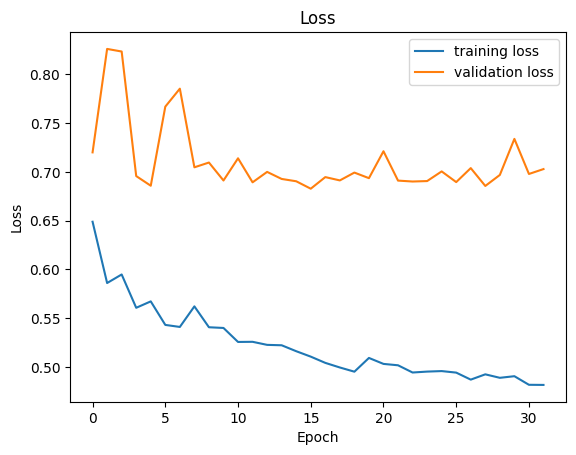

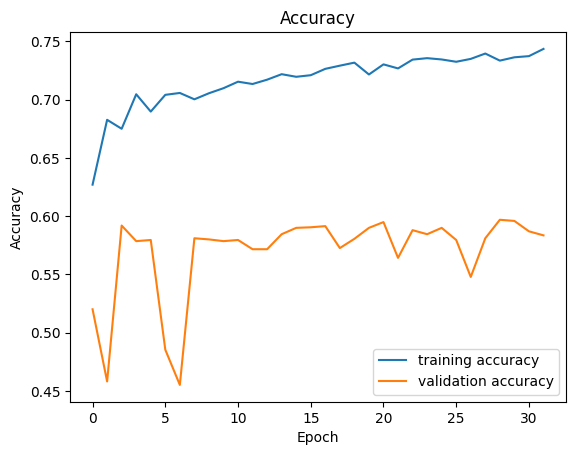

In [ ]:
import matplotlib.pyplot as plt

# Get training and validation loss values
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Get training and validation accuracy values
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Create plot for loss
plt.plot(training_loss, label='training loss')
plt.plot(validation_loss, label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Create plot for accuracy
plt.plot(training_accuracy, label='training accuracy')
plt.plot(validation_accuracy, label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data, predicted_labels)

# Print the confusion matrix
print(cm)


[[3808 1637]
 [1119 3519]]


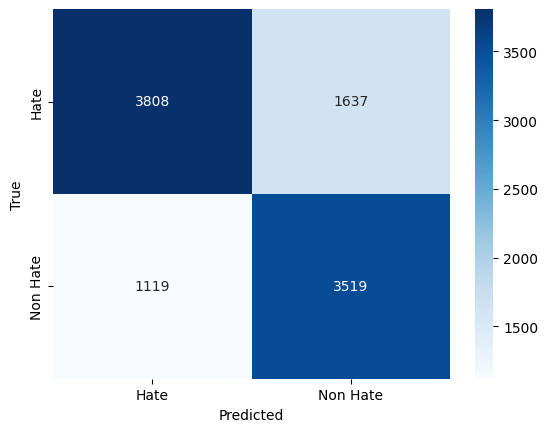

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()

In [ ]:
text_data_E = df_E['text'].values.tolist()
text_data_E = np.array(text_data_E)
label_data_E = df_E['label'].values.tolist()
label_data_E = np.array(label_data_E)
#print(label_data)

In [ ]:
#ENGLISH DATA
# Train the model
history = model.fit(text_data_E, label_data_E, epochs=32, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data_E)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy_E = accuracy_score(label_data_E, predicted_labels)
precision_E = precision_score(label_data_E, predicted_labels, average='macro')
recall_E = recall_score(label_data_E, predicted_labels, average='macro')
f1 = f1_score(label_data_E, predicted_labels, average='macro')
print(f"Accuracy: {accuracy_E:.4f}")
print(f"Precision: {precision_E:.4f}")
print(f"Recall: {recall_E:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/32
125/125 [==============================] - 53s 421ms/step - loss: 0.6449 - accuracy: 0.6256 - val_loss: 0.5874 - val_accuracy: 0.6940
Epoch 2/32
125/125 [==============================] - 52s 416ms/step - loss: 0.5506 - accuracy: 0.7132 - val_loss: 0.5216 - val_accuracy: 0.7460
Epoch 3/32
125/125 [==============================] - 62s 501ms/step - loss: 0.5271 - accuracy: 0.7280 - val_loss: 0.4956 - val_accuracy: 0.7660
Epoch 4/32
125/125 [==============================] - 62s 501ms/step - loss: 0.4906 - accuracy: 0.7673 - val_loss: 0.4868 - val_accuracy: 0.7730
Epoch 5/32
125/125 [==============================] - 62s 500ms/step - loss: 0.4760 - accuracy: 0.7668 - val_loss: 0.4790 - val_accuracy: 0.7740
Epoch 6/32
125/125 [==============================] - 62s 499ms/step - loss: 0.4677 - accuracy: 0.7793 - val_loss: 0.4737 - val_accuracy: 0.7800
Epoch 7/32
125/125 [==============================] - 62s 499ms/step - loss: 0.4588 - accuracy: 0.7818 - val_loss: 0.4613 - val_ac

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data_E, predicted_labels)

# Print the confusion matrix
print(cm)


[[2074  499]
 [ 321 2102]]


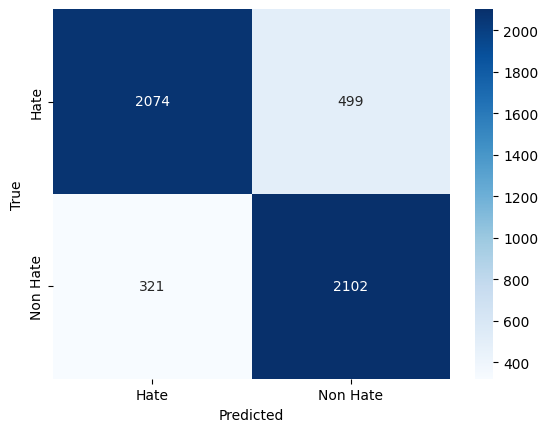

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()

In [ ]:
text_data_G = df_G['text'].values.tolist()
text_data_G = np.array(text_data_G)
label_data_G = df_G['label'].values.tolist()
label_data_G = np.array(label_data_G)
#print(label_data)

In [ ]:
#GERMAN DATA
# Train the model
history = model.fit(text_data_G, label_data_G, epochs=32, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data_G)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy_G = accuracy_score(label_data_G, predicted_labels)
precision_G = precision_score(label_data_G, predicted_labels, average='macro')
recall_G = recall_score(label_data_G, predicted_labels, average='macro')
f1 = f1_score(label_data_G, predicted_labels, average='macro')

print(f"Accuracy: {accuracy_G:.4f}")
print(f"Precision: {precision_G:.4f}")
print(f"Recall: {recall_G:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/32
76/76 [==============================] - 32s 428ms/step - loss: 0.7452 - accuracy: 0.5247 - val_loss: 0.7040 - val_accuracy: 0.5247
Epoch 2/32
76/76 [==============================] - 32s 421ms/step - loss: 0.6896 - accuracy: 0.5400 - val_loss: 0.6877 - val_accuracy: 0.5674
Epoch 3/32
76/76 [==============================] - 32s 419ms/step - loss: 0.6841 - accuracy: 0.5618 - val_loss: 0.6911 - val_accuracy: 0.5493
Epoch 4/32
76/76 [==============================] - 37s 488ms/step - loss: 0.6782 - accuracy: 0.5754 - val_loss: 0.6865 - val_accuracy: 0.5773
Epoch 5/32
76/76 [==============================] - 32s 419ms/step - loss: 0.6733 - accuracy: 0.5783 - val_loss: 0.6871 - val_accuracy: 0.5888
Epoch 6/32
76/76 [==============================] - 36s 476ms/step - loss: 0.6744 - accuracy: 0.5820 - val_loss: 0.6943 - val_accuracy: 0.5312
Epoch 7/32
76/76 [==============================] - 32s 417ms/step - loss: 0.6641 - accuracy: 0.5894 - val_loss: 0.6830 - val_accuracy: 0.5872

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data_G, predicted_labels)

# Print the confusion matrix
print(cm)


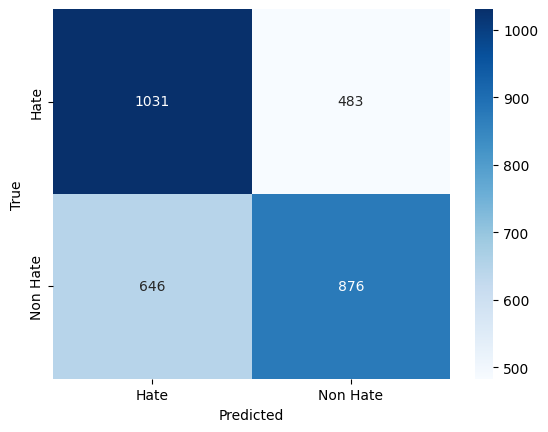

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()

In [ ]:
text_data_S = df_S['text'].values.tolist()
text_data_S = np.array(text_data_S)
label_data_S = df_S['label'].values.tolist()
label_data_S = np.array(label_data_S)
#print(label_data)

In [ ]:

# Train the model
history = model.fit(text_data_S, label_data_S, epochs=32, batch_size=32, validation_split=0.2, callbacks=[es])

# Evaluate the model
predictions = model.predict(text_data_S)
predicted_labels = tf.argmax(predictions, axis=1)
accuracy_S = accuracy_score(label_data_S, predicted_labels)
precision_S = precision_score(label_data_S, predicted_labels, average='macro')
recall_S = recall_score(label_data_S, predicted_labels, average='macro')
f1 = f1_score(label_data_S, predicted_labels, average='macro')
print(f"Accuracy: {accuracy_S:.4f}")
print(f"Precision: {precision_S:.4f}")
print(f"Recall: {recall_S:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch 1/32
29/29 [==============================] - 13s 435ms/step - loss: 0.4632 - accuracy: 0.7687 - val_loss: 0.7159 - val_accuracy: 0.6320
Epoch 2/32
29/29 [==============================] - 12s 432ms/step - loss: 0.4667 - accuracy: 0.7709 - val_loss: 0.7105 - val_accuracy: 0.5844
Epoch 3/32
29/29 [==============================] - 12s 427ms/step - loss: 0.4706 - accuracy: 0.7492 - val_loss: 0.7095 - val_accuracy: 0.6190
Epoch 4/32
29/29 [==============================] - 12s 418ms/step - loss: 0.4693 - accuracy: 0.7568 - val_loss: 0.7018 - val_accuracy: 0.6017
Epoch 5/32
29/29 [==============================] - 12s 426ms/step - loss: 0.4955 - accuracy: 0.7394 - val_loss: 0.7662 - val_accuracy: 0.6494
Epoch 6/32
29/29 [==============================] - 12s 419ms/step - loss: 0.4623 - accuracy: 0.7850 - val_loss: 0.7283 - val_accuracy: 0.6494
Epoch 7/32
29/29 [==============================] - 15s 507ms/step - loss: 0.4866 - accuracy: 0.7611 - val_loss: 0.7136 - val_accuracy: 0.5541

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the predicted labels
predicted_labels = tf.argmax(predictions, axis=1)

# Create the confusion matrix
cm = confusion_matrix(label_data_S, predicted_labels)

# Print the confusion matrix
print(cm)

[[802  27]
 [249  74]]


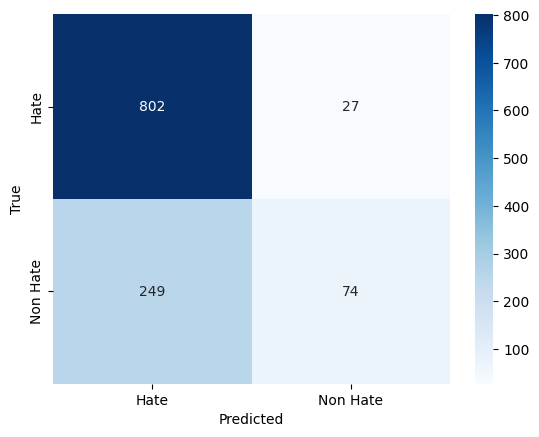

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define the labels for the matrix
labels = ['Hate', 'Non Hate']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')


# Show the plot
plt.show()